In [1]:
import json
import pandas as pd
import numpy as np

import scipy.interpolate as interp
import matplotlib.pyplot as plt
%matplotlib inline

<a list of 7 text.Text objects>

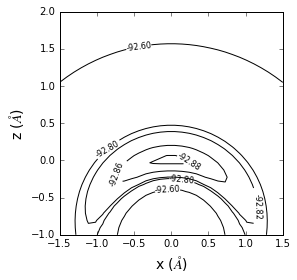

In [2]:
# import data and visualize
df = pd.read_json("../data/hf-ccd-ang-grid.json")

nx = len(df.x.unique())

plt.rcParams['contour.negative_linestyle'] = 'solid'
fig = plt.figure()
ax  = fig.add_subplot(111,aspect=1)
ax.set_xlabel("x ($\AA$)",fontsize=14)
ax.set_ylabel("z ($\AA$)",fontsize=14)

cs  = ax.contour(df.x.unique(),df.z.unique(),df.E.reshape(nx,nx).T
    ,levels=[-92.88,-92.86,-92.82,-92.8,-92.6], colors='k')
ax.clabel(cs, fontsize=8, inline=1,fmt="%2.2f")

In [3]:
# interpolate
large_grid = interp.interp2d(df.x.unique(),df.z.unique(),df.E)

In [4]:
# extract finer grid
nx = 16 # this can be arbitrarily large
xmin = -1. # this must be less than 1.5/sqrt(2) = 1.06
xmax =  1. # this must be less than 1.5/sqrt(2) = 1.06
zmin = -0.5 # this must be >= -1
zmax =  0.5 # this must be <=  2

xgrid = np.linspace(xmin,xmax,nx)
ygrid = xgrid[:] # copy xgrid
zgrid = np.linspace(zmin,zmax,nx)
grid3d = np.zeros([nx,nx,nx,5])
for i in range(nx):
    x = xgrid[i]
    for j in range(nx):
        y = ygrid[j]
        rho = np.sqrt(x*x+y*y)
        for k in range(nx):
            z = zgrid[k]
            grid3d[i,j,k,0] = x
            grid3d[i,j,k,1] = y
            grid3d[i,j,k,2] = z
            energy = large_grid(rho,z)[0]
            grid3d[i,j,k,3] = energy
            grid3d[i,j,k,4] = energy
        # end for k
    # end for j
# end for i

In [5]:
# -1 to 1 by -1 to 1 grid
#np.savetxt("unit%d.dat"%nx,grid3d.reshape(nx*nx*nx,5),fmt="%2.5f")

In [6]:
# -1 to 1 by -0.5 to 0.5 grid
np.savetxt("fat%d.dat"%nx,grid3d.reshape(nx*nx*nx,5),fmt="%2.5f")

### Visualize PES

In [25]:
grid_data = np.loadtxt("fat16.dat")

In [26]:
nx = int( round( grid_data.shape[0]**(1./3) ) )

In [27]:
grid_data = grid_data.reshape(nx,nx,nx,5)
x   = grid_data[:,0,0,0]
y   = grid_data[0,:,0,1]
z   = grid_data[0,0,:,2]
pot = grid_data[:,:,:,3]

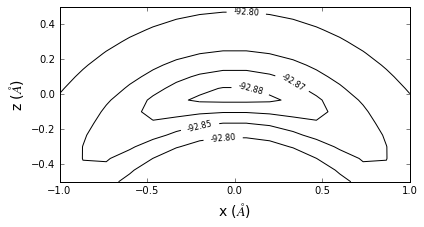

In [30]:
plt.rcParams['contour.negative_linestyle'] = 'solid'

fig = plt.figure()
ax  = fig.add_subplot(111,aspect=1)

ax.set_xlabel("x ($\AA$)",fontsize=14)
ax.set_ylabel("z ($\AA$)",fontsize=14)

manual_levels = [-92.88,-92.87,-92.85,-92.8]

cs = ax.contour( x,z,pot[:,int(round(nx/2)),:].T
        ,colors='k',levels=manual_levels)
ax.clabel(cs, fontsize=8, inline=1,fmt="%2.2f")
fig.tight_layout()
#plt.savefig("fat16.eps")